In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv('E:/data_science/ds_projects/Scientist_Case_Study_Data.csv')


In [9]:
df = data.copy()

In [10]:
df.head()

,row_num;locale;day_of_week;hour_of_day;agent_id;entry_page;path_id_set;traffic_type;session_durantion;hits
0,"988681;L6;Monday;17;1;2111;""31672;0"";6;7037;\N"
1,"988680;L2;Thursday;22;10;2113;""31965;0"";2;49;14"
2,"988679;L4;Saturday;21;2;2100;""0;78464"";1;1892;14"
3,988678;L3;Saturday;19;8;2113;51462;6;0;1
4,"988677;L2;Tuesday;6;10;2116;""31931;0"";1;2;3"


In [11]:
rows = pd.Series(df['row_num;locale;day_of_week;hour_of_day;agent_id;entry_page;path_id_set;traffic_type;session_durantion;hits'])

In [ ]:
#Spliting the data into rows

In [12]:
rows = rows.str.split(';',n=6, expand=True)

In [11]:
rows.head()

,0,1,2,3,4,5,6
0,988681,L6,Monday,17,1,2111,"""31672;0"";6;7037;\N"
1,988680,L2,Thursday,22,10,2113,"""31965;0"";2;49;14"
2,988679,L4,Saturday,21,2,2100,"""0;78464"";1;1892;14"
3,988678,L3,Saturday,19,8,2113,51462;6;0;1
4,988677,L2,Tuesday,6,10,2116,"""31931;0"";1;2;3"


In [ ]:
#saving the first six columns as seperate dataframe

In [13]:
first_set = rows.drop([6],axis=1)
first_set.head()

,0,1,2,3,4,5
0,988681,L6,Monday,17,1,2111
1,988680,L2,Thursday,22,10,2113
2,988679,L4,Saturday,21,2,2100
3,988678,L3,Saturday,19,8,2113
4,988677,L2,Tuesday,6,10,2116


In [14]:
#splitting the next columns 
#the number in quoted are asumming as path_id column

In [14]:
row2 = rows[6]
row2 = row2.str.replace('";', '"')

In [24]:
row2.head()

0    "31672;0"6;7037;\N
1      "31965;0"2;49;14
2    "0;78464"1;1892;14
3           51462;6;0;1
4        "31931;0"1;2;3
Name: 6, dtype: object

In [15]:
roww = row2.str.split('"', expand=True)

In [27]:
roww.head()

,0,1,2
0,,31672;0,6;7037;\N
1,,31965;0,2;49;14
2,,0;78464,1;1892;14
3,51462;6;0;1,None,None
4,,31931;0,1;2;3


In [16]:
row6 = roww[0].str.split(';',n=1, expand=True)

In [29]:
row6.head()

,0,1
0,,None
1,,None
2,,None
3,51462,6;0;1
4,,None


In [30]:
#replacing all None values with empty space in row6

In [17]:
mask = row6.applymap(lambda x: x is None)
cols = row6.columns[(mask).any()]
for col in row6[cols]:
    row6.loc[mask[col], col] = ''

In [32]:
row6.head()

,0,1
0,,
1,,
2,,
3,51462,6;0;1
4,,


In [ ]:
#replacing all None values with empty space in roww

In [18]:
mask = roww.applymap(lambda x: x is None)
cols = roww.columns[(mask).any()]
for col in roww[cols]:
    roww.loc[mask[col], col] = ''

In [34]:
roww.head()

,0,1,2
0,,31672;0,6;7037;\N
1,,31965;0,2;49;14
2,,0;78464,1;1892;14
3,51462;6;0;1,,
4,,31931;0,1;2;3


In [19]:
roww[1] = roww[1].str.cat(row6[0])
roww[2] = roww[2].str.cat(row6[1])
roww.drop([0],axis=1,inplace=True)

In [20]:
for i in roww.columns.values:
    roww[i]=roww[i].str.replace(' ','')
    roww[i]=roww[i].str.replace('\\','')

In [37]:
roww.head()

,1,2
0,31672;0,6;7037;N
1,31965;0,2;49;14
2,0;78464,1;1892;14
3,51462,6;0;1
4,31931;0,1;2;3


In [ ]:
#renaming the columns 

In [21]:
roww.columns = [6, 7]

In [39]:
roww.head()

,6,7
0,31672;0,6;7037;N
1,31965;0,2;49;14
2,0;78464,1;1892;14
3,51462,6;0;1
4,31931;0,1;2;3


In [23]:
next_split = roww.copy()

In [24]:
row7 = next_split[7]

In [25]:
third_set = row7.str.split(';',expand=True)

In [45]:
third_set.head()

,0,1,2
0,6,7037,N
1,2,49,14
2,1,1892,14
3,6,0,1
4,1,2,3


In [26]:
third_set.columns = [7,8,9]

In [27]:
six = next_split[6]
six.head()

0    31672;0
1    31965;0
2    0;78464
3      51462
4    31931;0
Name: 6, dtype: object

In [28]:
six = six.str.split(';',n=2,expand=True)

In [49]:
six.head()

,0,1,2
0,31672,0,None
1,31965,0,None
2,0,78464,None
3,51462,None,None
4,31931,0,None


In [29]:
mask = six.applymap(lambda x: x is None)
cols = six.columns[(mask).any()]
for col in six[cols]:
    six.loc[mask[col], col] = np.nan

In [30]:
mask = six.applymap(lambda x: x is '')
cols = six.columns[(mask).any()]
for col in six[cols]:
    six.loc[mask[col], col] = np.nan

In [31]:
six.isnull().sum()

0      4889
1    140241
2    862567
dtype: int64

In [56]:
#dropping the last column having morethan 80% nan values

In [32]:
second_set = six[[0,1]]

In [33]:
second_set.columns = ['path_id_1', 'path_id_2']

In [110]:
#second_set.head(100)
second_set.isnull().sum()

path_id_1      4889
path_id_2    140241
dtype: int64

In [ ]:
#combine all the columns 

In [34]:
new_df = pd.concat([first_set,second_set,third_set], axis=1)

In [35]:
new_df.head()

,0,1,2,3,4,5,path_id_1,path_id_2,7,8,9
0,988681,L6,Monday,17,1,2111,31672,0,6,7037,N
1,988680,L2,Thursday,22,10,2113,31965,0,2,49,14
2,988679,L4,Saturday,21,2,2100,0,78464,1,1892,14
3,988678,L3,Saturday,19,8,2113,51462,NaN,6,0,1
4,988677,L2,Tuesday,6,10,2116,31931,0,1,2,3


In [ ]:
#renaming the columns value

In [36]:
new_df.columns = ['row_num','locale','day_name','hour_of_day','agent_id','entry_page','path_id_1','path_id_2','traffic_type','session_duration','hits']

In [114]:
new_df.head()

,row_num,locale,day_name,hour_of_day,agent_id,entry_page,path_id_1,path_id_2,traffic_type,session_duration,hits
0,988681,L6,Monday,17,1,2111,31672,0,6,7037,N
1,988680,L2,Thursday,22,10,2113,31965,0,2,49,14
2,988679,L4,Saturday,21,2,2100,0,78464,1,1892,14
3,988678,L3,Saturday,19,8,2113,51462,NaN,6,0,1
4,988677,L2,Tuesday,6,10,2116,31931,0,1,2,3


In [37]:
new_df.dtypes

row_num             object
locale              object
day_name            object
hour_of_day         object
agent_id            object
entry_page          object
path_id_1           object
path_id_2           object
traffic_type        object
session_duration    object
hits                object
dtype: object

In [38]:
sem_df = new_df.copy()

In [39]:
sem_df.isnull().sum()

row_num                  0
locale                   0
day_name                 0
hour_of_day              0
agent_id                 0
entry_page               0
path_id_1             4889
path_id_2           140241
traffic_type             0
session_duration         0
hits                     0
dtype: int64

In [118]:
sem_df.dtypes

row_num             object
locale              object
day_name            object
hour_of_day         object
agent_id            object
entry_page          object
path_id_1           object
path_id_2           object
traffic_type        object
session_duration    object
hits                object
dtype: object

In [40]:
sem_df['hits'] = sem_df['hits'].replace('N', np.nan).astype('float')
sem_df['hits'] = sem_df['hits'].replace('a', np.nan).astype('float')
sem_df['session_duration'] = sem_df['session_duration'].replace('N', np.nan).astype('float')

In [41]:
to_float = ['row_num','hour_of_day', 'agent_id',
       'entry_page', 'path_id_1', 'path_id_2', 'traffic_type']

In [42]:
sem_df[to_float] = sem_df[to_float].astype('float')

In [43]:
sem_df.dtypes

row_num             float64
locale               object
day_name             object
hour_of_day         float64
agent_id            float64
entry_page          float64
path_id_1           float64
path_id_2           float64
traffic_type        float64
session_duration    float64
hits                float64
dtype: object

In [121]:
#dropping all rows having nan values present in hits column  

In [44]:
sem_df.dropna(subset=['hits'],axis=0, inplace=True)

In [87]:
# here path_id are location id, so assuming as nominal category and replacing all missing values with mode 
#session duration missin values are replcing with mean 

In [45]:
id1 = sem_df['path_id_1'].mode()
id2 = sem_df['path_id_2'].mode()
dur_sec = sem_df['session_duration'].mean()
print(id1,id2,dur_sec)

0    0.0
dtype: float64 0    0.0
dtype: float64 496.0625172707455


In [46]:
sem_df['path_id_1'] = sem_df['path_id_1'].fillna(0, axis=0)
sem_df['path_id_2'] = sem_df['path_id_2'].fillna(0, axis=0)
sem_df['session_duration'] = sem_df['session_duration'].fillna(496,axis=0)

In [47]:
sem_df.isnull().sum()

row_num             0
locale              0
day_name            0
hour_of_day         0
agent_id            0
entry_page          0
path_id_1           0
path_id_2           0
traffic_type        0
session_duration    0
hits                0
dtype: int64

In [49]:
#savin into new csv for backup
#sem_df.to_csv('E:\data_science\ds_projects\sem_cleaned_backup.csv',index=Flase)

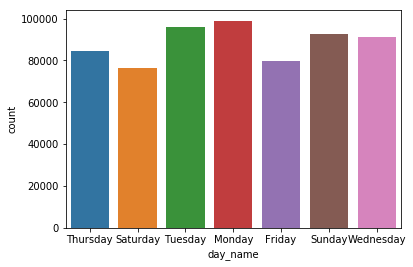

In [129]:
sns.countplot(x="day_name", data=sem_df)

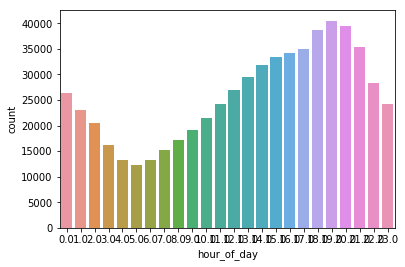

In [130]:
sns.countplot(x="hour_of_day", data=sem_df)

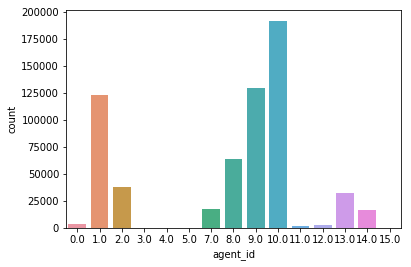

In [131]:
sns.countplot(x="agent_id", data=sem_df)

C:\Users\bluewelt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


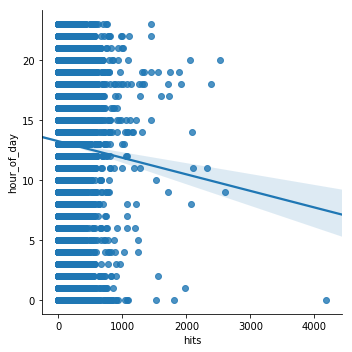

In [132]:
sns.lmplot(x= 'hits', y='hour_of_day', data= sem_df)

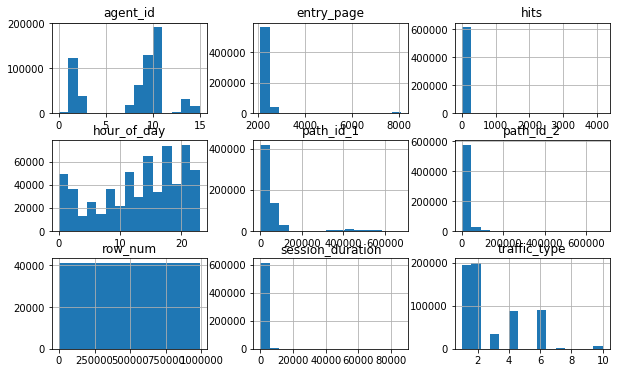

In [133]:
sem_df.hist(bins=15, figsize=(10, 6));

In [ ]:
# Due to lack of required ram memory, below code takes hours of time

In [ ]:
#for i in range(0,df_num.shape[0]):
#    if df_num['path_id_1'].iloc[i] == 0:
#        path_id = df_num['path_id_1'] + df_num['path_id_2']
#        df_num['path_id_2'] = 0

(array([154922.,  10955.,   6194.,   6076.,   2205.,   3186., 156159.,
         43724.,  35131.,  11915.,  16740.,   1024.,  13015.,   4691.,
         14882.,  53200.,   7435.,  14076.,  11285.,   1452.]),
 array([     0.,   5000.,  10000.,  15000.,  20000.,  25000.,  30000.,
         35000.,  40000.,  45000.,  50000.,  55000.,  60000.,  65000.,
         70000.,  75000.,  80000.,  85000.,  90000.,  95000., 100000.]),
 <a list of 20 Patch objects>)

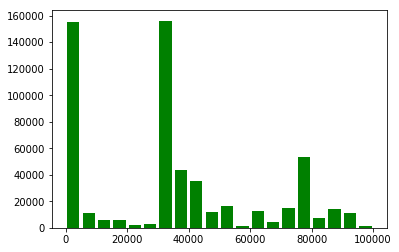

In [134]:
plt.hist(sem_df['path_id_1'], bins = 20, range=(0,100000), color = 'green', 
        histtype = 'bar', rwidth = 0.8)

In [71]:
sem_df = pd.read_csv('E:\data_science\ds_projects\sem_cleaned_backup.csv')
df = sem_df.copy()

In [52]:
#sem_df[['hour_of_day','agent_id','entry_page','path_id_1','traffic_type']] = sem_df[['hour_of_day','agent_id','entry_page','path_id_1','traffic_type']].astype('object')

In [ ]:
#converting catergorical features into numerical
# path_id_1, entry_Page have high cardinal features
# i tried different methods like frequency/count encodind
# onother method is taking 10 - 12 most frequent repeted values, used in KDD Cup Orange Challenge
# but i am tring with bucketing based on observations

In [72]:
path_id = df['path_id_1'] 

In [73]:
count=sem_df.shape[0]

In [ ]:
#replacing 0 as a in path_id_1
#grouping all variables with interval 10000 like (10000 to 20000)

In [76]:
inde=[]

In [78]:
df['path_id_1'] = df['path_id_1'].replace(0,'a')

[]

In [80]:
for i in range(0,count):
    if df['path_id_1'][i]>0 and df['path_id_1'][i]<10000:
        inde.append(i)

In [107]:
for i in inde:
    path_id[i]='b'

In [ ]:
#like be keep changing the interval and replacing different values for each interval
#after 100000 value, group with interval gap of 100000 

In [ ]:
inde=[]
for i in range(0,count):
    if df['path_id_1'][i]>=10000 and df['path_id_1'][i]<20000:
        inde.append(i)

for i in inde:
    path_id[i]='c'

In [ ]:
df['path_id_1'] = path_id

In [ ]:
#same like above I am cosidering count frequency in entry_page
# by observing the values_counts, replacing the all the values where count value upto 1000 

In [84]:
freq = df['entry_page'].value_counts()

In [112]:
df['entry_page'].value_counts()

2113.0    205968
2116.0    125338
2100.0    110762
2111.0     51932
2114.0     44589
2700.0     38823
8001.0     10867
2115.0     10655
2226.0      6400
2316.0      2012
2227.0      1821
2142.0      1275
2391.0       996
2704.0       808
2317.0       652
2370.0       605
2707.0       488
2365.0       455
8101.0       419
2166.0       322
2358.0       307
2146.0       284
2306.0       243
2775.0       223
2170.0       187
2371.0       146
2119.0       144
2283.0       144
2257.0       143
2181.0       132
           ...  
2844.0         2
2353.0         2
2706.0         2
2302.0         2
2136.0         1
2892.0         1
2778.0         1
2130.0         1
2449.0         1
2761.0         1
2311.0         1
2443.0         1
2848.0         1
2850.0         1
2503.0         1
2356.0         1
2843.0         1
2794.0         1
2851.0         1
2840.0         1
2753.0         1
2712.0         1
2721.0         1
2202.0         1
2727.0         1
2728.0         1
2172.0         1
2733.0        

In [116]:
page = df['entry_page']

In [117]:
page = page.replace(2113 ,'aa')
page = page.replace(2116 ,'bb')
page = page.replace(2100 ,'cc')
page = page.replace(2111 ,'dd')
page = page.replace(2114 ,'ee')
page = page.replace(2700 ,'ff')
page = page.replace(8001 ,'gg')
page = page.replace(2115 ,'hh')
page = page.replace(2226 ,'ii')
page = page.replace(2316 ,'jj')
page = page.replace(2227 ,'jj')
page = page.replace(2142 ,'jj')


In [118]:
val=[2391,2119, 2121, 2122, 2123, 2124,
       2125, 2126, 2128, 2130, 2133, 2135, 2136, 2143, 2145, 2146,
       2148, 2153, 2155, 2156, 2160, 2166, 2168, 2170, 2172, 2181, 2188,
       2202, 2206, 2215, 2216, 2252, 2255, 2257, 2260, 2262,
       2279, 2283, 2296, 2301, 2302, 2306, 2307, 2310, 2311, 2313, 2315,
       2317, 2331, 2350, 2351, 2353, 2356, 2357, 2358, 2359, 2362,
       2364, 2365, 2367, 2370, 2371, 2394, 2398, 2407, 2440, 2443,
       2446, 2448, 2449, 2501, 2502, 2503, 2701, 2702, 2704, 2706,
       2707, 2710, 2711, 2712, 2713, 2714, 2719, 2720, 2721, 2727, 2728,
       2733, 2750, 2753, 2759, 2761, 2764, 2765, 2773, 2775, 2776, 2777,
       2778, 2784, 2788, 2791, 2792, 2793, 2794, 2812, 2840, 2843, 2844,
       2846, 2848, 2850, 2851, 2863, 2873, 2874, 2884, 2892, 6999,
       8002, 8006, 8010, 8020, 8101 ]

In [119]:
for i in val:
    page = page.replace(i ,'kk')

In [120]:
page.value_counts()

aa    205968
bb    125338
cc    110762
dd     51932
ee     44589
ff     38823
gg     10867
hh     10655
kk      8793
ii      6400
jj      5108
Name: entry_page, dtype: int64

In [135]:
#df['entry_page'] = page
df['path_id_1'] = df2['path_id_1']

In [133]:
#df.head()

In [137]:
#df.to_csv('E:/data_science/ds_projects/sem_bucketing.csv',index=False)
#df2.head

In [136]:
df.head()

,row_num,locale,day_name,hour_of_day,agent_id,entry_page,path_id_1,path_id_2,traffic_type,session_duration,hits
0,988680.0,L2,Thursday,22,10,aa,e,0.0,2,49.0,14.0
1,988679.0,L4,Saturday,21,2,cc,a,78464.0,1,1892.0,14.0
2,988678.0,L3,Saturday,19,8,aa,g,0.0,6,0.0,1.0
3,988677.0,L2,Tuesday,6,10,bb,e,0.0,1,2.0,3.0
4,988676.0,L3,Monday,1,8,cc,a,0.0,1,0.0,2.0


In [138]:
df.dtypes

row_num             float64
locale               object
day_name             object
hour_of_day          object
agent_id             object
entry_page           object
path_id_1            object
path_id_2           float64
traffic_type         object
session_duration    float64
hits                float64
dtype: object

In [131]:
df[['hour_of_day','agent_id','traffic_type']] = df[['hour_of_day','agent_id','traffic_type']].astype('object')

In [166]:
locale_dumy = pd.get_dummies(df['locale'],prefix='locale',drop_first=True)
day_name_dumy = pd.get_dummies(df['day_name'],prefix='day', drop_first=True)
hour_of_day_dumy = pd.get_dummies(df['hour_of_day'],prefix='hour', drop_first=True)
agent_id_dumy = pd.get_dummies(df['agent_id'],prefix='agent',drop_first=True)
entry_page_dumy = pd.get_dummies(df['entry_page'],prefix='page',drop_first=True)
path_id_dumy = pd.get_dummies(df['path_id_1'],prefix='path',drop_first=True)
traffic_dumy = pd.get_dummies(df['traffic_type'],prefix='traffic',drop_first=True)

In [168]:
dum_df  = pd.concat([df['row_num'],locale_dumy,day_name_dumy,hour_of_day_dumy,agent_id_dumy,entry_page_dumy,path_id_dumy,df['session_duration'],df['hits']],axis=1)

In [170]:
dum_df.head()


,row_num,locale_L2,locale_L3,locale_L4,locale_L5,locale_L6,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,path_j,path_k,path_l,path_m,path_n,path_o,path_p,path_q,session_duration,hits
0,988680.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,49.0,14.0
1,988679.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1892.0,14.0
2,988678.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
3,988677.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,3.0
4,988676.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,2.0


In [169]:
dum_df.shape

(619235, 77)

In [171]:
dum_df.columns

Index(['row_num', 'locale_L2', 'locale_L3', 'locale_L4', 'locale_L5',
       'locale_L6', 'day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday',
       'day_Tuesday', 'day_Wednesday', 'hour_1.0', 'hour_2.0', 'hour_3.0',
       'hour_4.0', 'hour_5.0', 'hour_6.0', 'hour_7.0', 'hour_8.0', 'hour_9.0',
       'hour_10.0', 'hour_11.0', 'hour_12.0', 'hour_13.0', 'hour_14.0',
       'hour_15.0', 'hour_16.0', 'hour_17.0', 'hour_18.0', 'hour_19.0',
       'hour_20.0', 'hour_21.0', 'hour_22.0', 'hour_23.0', 'agent_1.0',
       'agent_2.0', 'agent_3.0', 'agent_4.0', 'agent_5.0', 'agent_7.0',
       'agent_8.0', 'agent_9.0', 'agent_10.0', 'agent_11.0', 'agent_12.0',
       'agent_13.0', 'agent_14.0', 'agent_15.0', 'page_bb', 'page_cc',
       'page_dd', 'page_ee', 'page_ff', 'page_gg', 'page_hh', 'page_ii',
       'page_jj', 'page_kk', 'path_b', 'path_c', 'path_d', 'path_e', 'path_f',
       'path_g', 'path_h', 'path_i', 'path_j', 'path_k', 'path_l', 'path_m',
       'path_n', 'path_o', 'path_

In [173]:
#dum_df.to_csv('E:/data_science/ds_projects/sem_preprocessed.csv',index=False)

In [3]:
df = pd.read_csv('E:/data_science/ds_projects/sem_preprocessed.csv')

In [4]:
df.head()

,row_num,locale_L2,locale_L3,locale_L4,locale_L5,locale_L6,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,path_j,path_k,path_l,path_m,path_n,path_o,path_p,path_q,session_duration,hits
0,988680.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,49.0,14.0
1,988679.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1892.0,14.0
2,988678.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,1.0
3,988677.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,3.0
4,988676.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,2.0


In [65]:
df.dtypes

row_num             float64
locale_L2             int64
locale_L3             int64
locale_L4             int64
locale_L5             int64
locale_L6             int64
day_Monday            int64
day_Saturday          int64
day_Sunday            int64
day_Thursday          int64
day_Tuesday           int64
day_Wednesday         int64
hour_1.0              int64
hour_2.0              int64
hour_3.0              int64
hour_4.0              int64
hour_5.0              int64
hour_6.0              int64
hour_7.0              int64
hour_8.0              int64
hour_9.0              int64
hour_10.0             int64
hour_11.0             int64
hour_12.0             int64
hour_13.0             int64
hour_14.0             int64
hour_15.0             int64
hour_16.0             int64
hour_17.0             int64
hour_18.0             int64
hour_19.0             int64
hour_20.0             int64
hour_21.0             int64
hour_22.0             int64
hour_23.0             int64
agent_1.0           

In [70]:
#df['hits'] = df['hits'].astype('float')
df['hits'].value_counts()

3.0       98274
4.0       65158
2.0       50675
5.0       37135
1.0       29381
6.0       22935
7.0       19008
8.0       16466
9.0       14891
10.0      14299
11.0      14089
12.0      13287
13.0      12484
14.0      11735
15.0      11177
16.0      10177
17.0       9530
18.0       8772
19.0       8280
20.0       7707
21.0       6935
22.0       6423
23.0       6009
24.0       5565
25.0       5169
26.0       4796
27.0       4429
28.0       4273
29.0       4016
30.0       3813
31.0       3502
32.0       3401
33.0       3265
34.0       2989
35.0       2877
36.0       2794
37.0       2672
38.0       2556
39.0       2321
40.0       2176
41.0       2174
42.0       2023
43.0       1956
44.0       1782
a          1776
45.0       1756
46.0       1691
47.0       1587
49.0       1490
48.0       1478
50.0       1274
52.0       1169
51.0       1118
55.0       1090
54.0       1062
53.0       1027
57.0        979
56.0        965
59.0        871
58.0        832
61.0        825
60.0        811
63.0    

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [17]:
duration = df.iloc[:,-2:-1]
duration_scr = scaler.fit_transform(duration)

In [19]:
df['session_duration']=duration_scr

In [29]:
df.head()

,row_num,locale_L2,locale_L3,locale_L4,locale_L5,locale_L6,day_Monday,day_Saturday,day_Sunday,day_Thursday,...,path_j,path_k,path_l,path_m,path_n,path_o,path_p,path_q,session_duration,hits
0,988680.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-0.227486,14.0
1,988679.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.710319,14.0
2,988678.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-0.252420,1.0
3,988677.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.251402,3.0
4,988676.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-0.252420,2.0


C:\Users\bluewelt\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


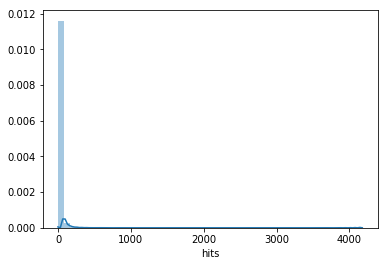

In [77]:
sns.distplot(df['hits'])

In [24]:
df['hits'].describe()

count    619235.000000
mean         18.210079
std          39.099699
min           1.000000
25%           3.000000
50%           7.000000
75%          19.000000
max        4174.000000
Name: hits, dtype: float64

In [78]:
df['hits'].value_counts()

3.0       98274
4.0       65158
2.0       50675
5.0       37135
1.0       29381
6.0       22935
7.0       19008
8.0       16466
9.0       14891
10.0      14299
11.0      14089
12.0      13287
13.0      12484
14.0      11735
15.0      11177
16.0      10177
17.0       9530
18.0       8772
19.0       8280
20.0       7707
21.0       6935
22.0       6423
23.0       6009
24.0       5565
25.0       5169
26.0       4796
27.0       4429
28.0       4273
29.0       4016
30.0       3813
31.0       3502
32.0       3401
33.0       3265
34.0       2989
35.0       2877
36.0       2794
37.0       2672
38.0       2556
39.0       2321
40.0       2176
41.0       2174
42.0       2023
43.0       1956
44.0       1782
45.0       1756
46.0       1691
47.0       1587
49.0       1490
48.0       1478
50.0       1274
52.0       1169
51.0       1118
55.0       1090
54.0       1062
53.0       1027
57.0        979
56.0        965
59.0        871
58.0        832
61.0        825
60.0        811
63.0        768
62.0    

In [83]:
#y = np.log(log_df['hits'])
val=[]
count=df.shape[0]
count

615143

In [93]:
#for i in range(0,1000):
#    if df['hits'][i]>50:
#        val.append(i)

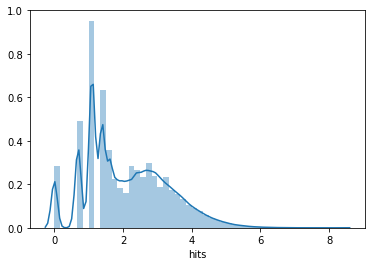

In [39]:
sns.distplot(y)

In [127]:
x = df.drop(['row_num','hits'],axis=1)
#y = df.iloc[:,-1:]
y = df['hits']

In [100]:
#from sklearn.ensemble import ExtraTreesClassifier
#model = ExtraTreesClassifier(n_estimators=10)
#model.fit(x,y)
#print(model.feature_importances_)


In [102]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

In [110]:
from sklearn.decomposition import PCA
pca= PCA(n_components=5)
pca.fit(x)
X_dr= pca.transform(x)

In [111]:
x_train,x_test,y_train,y_test = train_test_split(X_dr,y, random_state=42, train_size=0.1)

C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [112]:
model = RandomForestRegressor(n_estimators = 100) 
model.fit(x_train,y_train)


C:\Users\bluewelt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [109]:
model.score(x_train,y_train)

0.8830500202690383

In [113]:
model.score(x_train,y_train)

0.8852930986339881

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
reg= DecisionTreeRegressor(random_state = 0)

In [116]:
reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [117]:
reg.score(x_train,y_train)

0.9999565974934911

In [131]:
from sklearn.feature_selection import f_regression
f_regression(x,y)
p_values = f_regression(x,y)[1].round(3)

pval=[]
for i in range(0,75):
    if p_values[i] <=0.05:
        pval.append(i)
        
xcol = x.columns
new_df = []
for i in pval:
    new_df.append(xcol[i])

x_df = x[new_df]  

In [126]:
x_df.columns

Index(['locale_L2', 'locale_L3', 'locale_L4', 'locale_L5', 'locale_L6',
       'day_Monday', 'day_Saturday', 'day_Tuesday', 'day_Wednesday',
       'hour_1.0', 'hour_7.0', 'hour_12.0', 'hour_13.0', 'hour_18.0',
       'hour_23.0', 'agent_1.0', 'agent_3.0', 'agent_4.0', 'agent_5.0',
       'agent_7.0', 'agent_8.0', 'agent_9.0', 'agent_10.0', 'agent_12.0',
       'agent_13.0', 'page_bb', 'page_cc', 'page_dd', 'page_ee', 'page_ff',
       'page_gg', 'page_hh', 'page_ii', 'page_jj', 'page_kk', 'path_c',
       'path_d', 'path_e', 'path_f', 'path_g', 'path_h', 'path_i', 'path_j',
       'path_k', 'path_l', 'path_m', 'path_n', 'path_o', 'path_p', 'path_q',
       'session_duration'],
      dtype='object')

In [128]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y, random_state=42, train_size=0.1)

C:\Users\bluewelt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [129]:
model = RandomForestRegressor(n_estimators = 100) 
model.fit(x_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [130]:
model.score(x_train,y_train)

0.884812857883743